# Week 3

**Topics**: Introducing functions and modules in Python. Basic introduction to pandas for data analysis, focusing on importing data and initial data exploration.

**Fun detours**
* Use openai chatgpt to do some text AI
* Web page hosted in python

## Functions
A function is a grouping of code that we assign a name and can pass specific data to (arguments) and return data from (return value)

We use functions for a few things:
* Reduce dupliation in code - use the same function in multiple places in your code.
* Simplify code - breaking down complex code into smaller, separate, problems make the entire code more managable and maintainable. 
* Readability - named functions say specifically what they're going to do, so our program is less cluttered and easier to follow. 



### General Format of a Function
Here's how we define a function:

    def function_name(arg1, arg2, ...):
        '''function description in tripple quoted block of text.
        This is not mandatory, but is good practice.'''
        function
        code
        here
        some_value = foo
        return some_value

We can only return one object, but because that object can be a collection like a list or dictionary, we can bundle things to pass them all out.  Examples:

    return {'a': 'dictionary', 'is': 'okay}
    return 'this', 'will', 'return', 'a', 'tuple'
    x = ['a', 'list', 'works', 'too']
    return x

Here's an example returning a tuple:

In [ ]:
def compute_stats_on_numbers(list_of_numbers):
    sum_of_numbers = sum(list_of_numbers)
    count_of_numbers = len(list_of_numbers)
    average_of_numbers = sum_of_numbers / count_of_numbers
    return sum_of_numbers, count_of_numbers, average_of_numbers  # This is a tuple.  The () around it are implied

numbers = [1, 2, 3, 4, 5]
num_sum, num_count, num_avg = compute_stats_on_numbers(numbers)

print(f'The function says - Sum: {num_sum}, Count: {num_count}, Average: {num_avg}')

### Scope
This is a new concept for us - there are certain places where variables can be defined that they will be unaccessible externally.  The variables have a specific scope in which they can be used. 
* **Global** - variables defined outside of functinos, classes, etc, in your program are accessible from everywhere. However, it's bad practice to use global variables from inside of functions as it makes it hard to follow what data is used by the function.  Side effects can be introduced.
* **Functions** - variables defined inside of functions are not visible outside of the function.  This means we don't neeed to worry about accidentally using a variable from a(nother) function when we don't mean to. 
* **Classes/Objects** - objects (instances of a class) have thier own variables/properties and functions that aren't accessible externally.
* **Modules** - modules imported like, "import pandas", have their own scope inside of "pandas" that we access via the module name, like "pandas.DataFrame".  If we were to do "from pandas import *", then all things in the pandas namespace would be populated into our global namespace and we could directly access DataFrame.  This can introduce problems, e.g., if multiple modules have things with the same name inside of them. It's better to import specific things to our global namespace if wanted... "from pandas import DataFrame" will only add the DataFrame class to our global namespace.
* And a few other places.  Try except blocks, inside of list comprehensions, etc.

What this means to us with regard to functions is that we should pass data the function needs in as arguments, create any variables in the function that we need without worrying about them polluting the namespace of our greater program, and then return the important data from the function with a return call.

#### *Exercise*
Let's investigate the nuances of global and local variables in a function.  Do this:

* Run the cell below and not the values of x inside and outside of the function.
* Uncomment the x=3 line and see what changes
* Uncomment the global declaration in the function ans run it again to see what changes.

At first, x only exists in the global namespace, so when we call print, python finds it there. 

When we uncomment the x=3, we define x in the function's local namespace, so that is what gets printed.  The function's namespace will always be used before the global namespace. Note that we don't overwrite the global namespace x value when we set x in the function. 

When we uncomment the global line, we are declaring that the x in the function is in the global namespace, so when we set x=3, we are able to change the global x.  There are times when this is useful, but in general we should try not to do this because it makes it harder to debug code and hides interaction between stuff.  We should pass data the function needs in as arguments. 

In [ ]:
x = 2
def print_a_value(foo):
    # global x
    # x = 3
    print('x in func is:', x)
    print('foo in func is:', foo)
print('global x is', x)
print_a_value(x)
print('now global x is', x)

### Positional Arguments
When we define a function with multiple arguments like this:

    def do_the_thing(pos1, pos2, pos3, ..., posN):

We must pass the function N arguments with positions corresponding with the function definition.

    return_value = do_the_thing('stuff1', 'stuff2', 'stuff3', ..., 'stuffN')

### Optional Arguments
We can also set default values for arguments, startning with argument N and working backward.  We cannot set a default values for pos1 but not for pos2.

    def do_the_thing(arg1, arg2, arg3=False, arg4=True)

In this case, we must pass arg1 and arg2, but we can omit arg3 and arg4 if we don't need them. 

Consider this example:

In [ ]:
import random
import pandas as pd

def generate_random_data(num_rows, num_cols, to_dataframe=False):
    '''Thes function accepts a number of rows and number of columns and
    generates a table of random data.  If to_dataframe is True, it will
    return a pandas DataFrame.  Otherwise, it will return a list of dictionaries.'''
    data = [
        {f'col_{j+1}': random.random() for j in range(num_cols)}
        for i in range(num_rows)
    ]
    
    if to_dataframe:
        data = pd.DataFrame(data)
    
    return data

# Example usage
random_data_list = generate_random_data(5, 3)  # not necessary to specify to_dataframe=False
random_data_df = generate_random_data(5, 3, to_dataframe=True)

print(random_data_list)
print(random_data_df)

In the two lines from Example usage, the fist line skipps passing to_dataframe because the default value is acceptable.

#### *Exercise*
Write a functon called **prompt_user** that accepts two arguments, **choices**, and **num_tries**.  

It should ask the user to chose one of the choices, and then try num_tries times to let them type in a choice. If what they type in doesn't match any choices, then have them try again.  If they don't do it successfully in num_tries, then return False. If they do chose one, then return that choice. 

In [ ]:
def prompt_user(...):
    ...
    return user_input

In [ ]:
# Let's test it!
choices = ['red', 'green', 'blue']
choice = prompt_user(choices, 2)
if choice:
    print(f'You chose {choice}')
else:
    print('You did not choose a valid option')

### Keyword Arguments
Finally, some functions have lots of optional arguments.  Often with default values of False for skipping some functionality in the function, or they could have sane defaults like a function to read_a_csv_file might have a default header_row=0 to use the first row of the file as the column headers.  You'd only change it when you call the function if you have padding rows at the top of your file. 

Let's look at some examples of the pandas read_excel function with different combinations of arguments given.  Compare to the function documentation here: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

If we have an excel file with multiple sheets, but we want specifically to load the data from sheet2, we can do:

    df = pd.read_excel('data.xlsx', sheet_name='Sheet2')

Or if it is only one sheet, but we want to load specific columns and skip the top two rows in the file:

    df = pd.read_excel('data.xlsx', usecols=['A', 'C', 'E'], skip_rows=2)


### Arbitrary Arguments
We won't get into this, but look into *args and **kwargs.  You can make a funcation accept any arguments.  An example use for this is cerating your own version of the print function:

    DEBUG = True

    def debug_print(*args, **kwargs):
        if DEBUG:
            print(*args, **kwargs)

#### *Exercise*
Let's make a "greeting_generator" function that accepts a few arguments and returns a string with the generated greeting message. Arguments:
* name - required argument, so it should not have a default value. 
* greeting - optional argument with a default value of "Hello". 
* punctuation - optional argument with default value of "!".
* height_in_feet - optional argument with default value of False. If given, we append the string with something witty about the user's height.

In [ ]:
def greeting_generator(...):
    ...
    return greeting

# Let's test it!
print(greeting_generator('Bob'))
print(greeting_generator('Alice', 'Good morning'))
print(greeting_generator('Charlie', height=6))
print(greeting_generator('Diane', punctuation='!', height=4))
print(greeting_generator('Eve', 'Good night', '!', 5))

## Modules
We've used a few modules so far.  Here's a summary of some common modules:

* **Data analysis and math**
  * pandas - Manipulate structured data in DataFrames.  Built on numpy.  Sort of like excel but less tedious. 
  * matplotlib - Data visualization tool.  We use it to generate axis and subplots for more interesting plots. 
  * seaborn - Advanced data visualization and analysis tools.  
  * numpy - Work with arrays of data.  Vectorize data operations for performance. 
  * math - Trig functions, sqrt, etc. Used for individual values.  x = math.tan(y)
  * datetime - Convert string data to datetime objects and vice-versa.  Perform time operations, like adding hours, days, etc. 
* **OS and file handing**
  * sys - Access environment variables, "exit", get system information.
  * os - List files (os.listdir), modify permissions, filesystem stats, user account stuff. 
  * shutil - Helper funcions for moving and copying files, few other things.
  * tar, zip - Open or create zip and tar archive files with these. tar is more common on linux systems. 
  * subprocess - Execute programs or commands outside of python.
* **Data encapsulation and databases...**
  * json - Structured text format of the web and many things. Use format="pretty"
  * yaml - Like json, but more friedly for humans to edit the files.  More flexible allowing in line comments in the file.
  * pickle - pickle and unpickle nearly any python object to save in a file. 
  * sqlite3 - file based database
  * mysql - open source mysql database connections...
  * pyodbc - odbc based database connections
* **Network stuff**
  * requests - talk to web servers

### Conventional short names
Some modules have accepeted conventions for short names to reduce typing and whatnot. Here are a few common ones:
* import pandas as pd
* import numpy as np
* import subprosess as sp

### Importing modules or parts of modules

We can import modules and access their tools my module name like:

    import math
    x = math.sqrt(50)

Or we can import specific components of a module:

    from math import sqrt,cos,sin
    x = cos(30)

You can import all things from a module into your global namespace, but it's discouraged.  What if you import two modules that have components with the same names in them?

    from math import *

When we do "import math", all of the variables and functions in that module are protected in a private namespace that we access via math.something().  

#### *Exercise*
Let's start getting more familiar with pandas.
* Read through this: https://pandas.pydata.org/docs/user_guide/10min.html
* Import the pandas module and use dir(pd) to see what functionality is built into it.  Or if you have python running in a terminal, type 'pd.' and hit the tab key to show a list of functions built into it. 
* Create an empty pandas dataframe and do the same as above to see what functionality is built into it. 

In [ ]:
import pandas as pd

df = pd.DataFrame()  # An empty dataframe

# First Pandas Experiment
Nasa has this list of meteorites that we can use.  Let's see what we can learn about this data.  We'll import it and generate some plots to better understand it.

First thing is importing.  We use requests to query the url, get the json data, and convert it to a dataframe.  A few useful funtions for viewing data in a dataframe are .head(), .tail(), and .info().  

In [1]:
import requests
import pandas as pd
meteorites = requests.get('https://data.nasa.gov/resource/y77d-th95.json').json()
mets = pd.DataFrame(meteorites)
mets.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN


Great, so we have geolocation, mass, and datetime info for each meteor.  Let's try graphing mass per date to see if there's any obvious trend. 

We need each column to be the correct datatype before we can generate a plot.
* To simplify the datetime 'year' column, I use a string operation to split it on the 'T' ang take just the year, month and day.  Then we can use pd.to_datetime do convert it to a datetime object by passing in the format to use to convert it. 
* We need the mass to be a numeric value so we overwrite the column with itself converted using pd.to_numeric.  Similarly, there ar pd.to_int, pd.to_float, pd.to_string operatoins that we might want to use in other cases. 

Finally, pandas has a built in plot function that can generate a bunch of different graph types. Setting 'logy' says to graph the y axis in log scale. Try setting it and see what happens to the data points and y axis scale. 

https://www.w3schools.com/python/gloss_python_date_format_codes.asp

<Axes: title={'center': 'Meteorite Mass by Date'}, xlabel='ymd', ylabel='mass'>

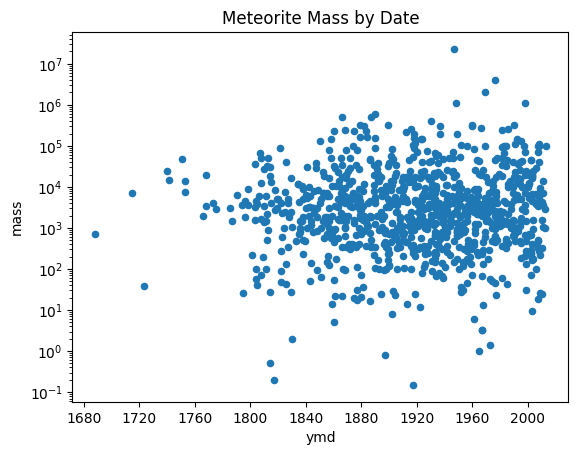

In [2]:
# Graph the meteorites by date and mass
mets['ymd'] = mets['year'].str.split('T').str[0]
mets['ymd'] = pd.to_datetime(mets['ymd'], format='%Y-%m-%d', errors='coerce')
mets['mass'] = pd.to_numeric(mets['mass'])
mets.plot.scatter(x='ymd', y='mass', logy=True, title='Meteorite Mass by Date')

That's neat, but doesn't show much of a trend except that we probably have better records of meteorites found since the late 1800s.  Maybe it would be interesting to see where on earth we are finding the meteorites.  

Let's plot them on a map of the earth.  First thing for that is to get a map of the earth.  We can use some geopandas stuff for that.  Below, "world" is a dataframe with rows for each landmass on a map.  Try printing world.head() to see some of the actual data.  

https://geopandas.org/en/stable/docs/user_guide.html

<Axes: >

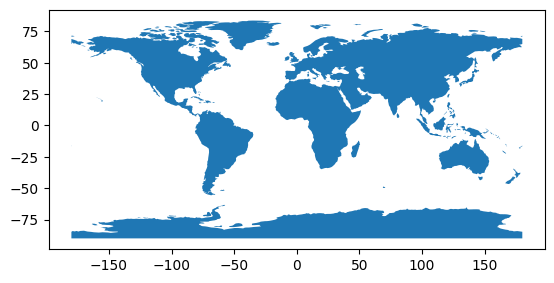

In [3]:
import geopandas
from geodatasets import get_path

path = get_path("naturalearth.land")
world = geopandas.read_file(path)
world.plot()

And now lets put it together!  Plotting can get complicated fast... I think that's a weakness of this stuff in python with the pandas, matplotlib libraries, but it's very powerful at least. 

To combine plots, we initialize an axis that we pass to the .plot function when we call it for the world and our meteorite dataframes so that the can draw themselves on the same graph. 'ax=ax' looks a littele weird.  We'r passing a variable named ax to an argument with the same name.  It's just sort of convention to do it this way.  Maybe it would be better to use axis for the variable name and pass that to the plot function. 

We need to convert our reclong and reclat (longitude and latitude) to numeric values to plot them, so use call .astype(float) to do a type conversion from string.

You can change the colormap - if you put in a bad value, it'll print a bunch you can try in the error message.  And the norm= is to convert the mass to log scale here so that we get nice colors for all of the meteorite masses. 

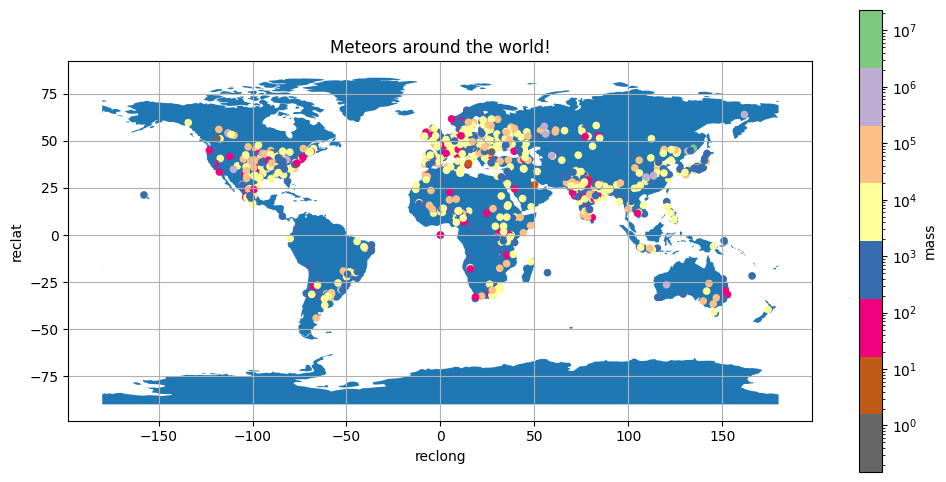

In [4]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))           # create a figure and axis

world.plot(ax=ax)                                # plot the world on the axis

mets['reclong'] = mets['reclong'].astype(float)  # convert reclong column from string to float
mets['reclat'] = mets['reclat'].astype(float)    # convert reclat column from string to float

# plot the meteorites on the same axis
mets.plot(x="reclong", y="reclat", kind="scatter", 
        c="mass", colormap="Accent_r", 
        title=f"Meteors around the world!", 
        ax=ax, norm=matplotlib.colors.LogNorm())

ax.grid(True)                                   # turn on the grid
plt.show()

Well that's neat.  I extected to see more concentration around the equator.  We might need to normalize for population density (people who could see and find an asteroid to report on) to get an idea of were most asteroids actually fall.  There is a larger version of this dataset at: 

We'll look at more actual numerical analysis stuff in Week 4.

#### *Exercise*
Open a new notebook and download the dataset for observed meteors from here: https://www.kaggle.com/datasets/ramjasmaurya/fireballsbolides-1988-april-2022.  Save it in the same directory as your notebook.  If you're working in Google Colab, you should be able to go to File -> Locate notebook in Drive, and then upload the dataset csv file to the same directory in Google drive. 

Copy over the following code to get started, and use the above example for the meteorites to make a couple of graphs for this new dataset.
* radiated energy vs time
* altitude vs radiated energy
* try using .corr(numeric_only=True) on the dataframe to see which numeric columns have the strongest correlation.   What can we say about these boloids when they enter our atmosphere?

In [ ]:
csv_file_name = 'nasas fireballs.csv'
nfb = pd.read_csv(csv_file_name)
# nfb.head() # Uncomment to see the first few rows of the data
# nfb.info() # Uncomment to see the column names and data types of each column

# the date/time ... column is a string that we want to convert to a datetime object
# we're creating a 'date' column for this.  We could also overwrite the existing column
# nfb['date'] = pd.to_datetime(nfb['date/time for peak brightness'])


#### *Exercise*
Go through some of these datasets and find something that looks interesting to you that we can work on next week.

* https://github.com/jdorfman/awesome-json-datasets - we can direcly query these using requests and the url as we did for the meteorite data. 
* https://catalog.data.gov/dataset/
* https://data.fivethirtyeight.com/ - they have zip files with csv data
* https://www.kaggle.com/datasets - click all data sets and you'll see loads of stuff.  looks like they have large csv files to download.

# Week 3 Turtle Challenge
This week, we can use functions to isolate complex operations into little chunks that are used by other code to perform complex behavior with simple, readable, code.
  
#### *Exercise*:
Streamline your turtle code from last week by moving the functionality to draw arbitrary shapes into a function.  The function should take arguments for numbers of sides and size and will be called from the ret of your code from last time.